In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image Preprocessing - Histogram Equalization

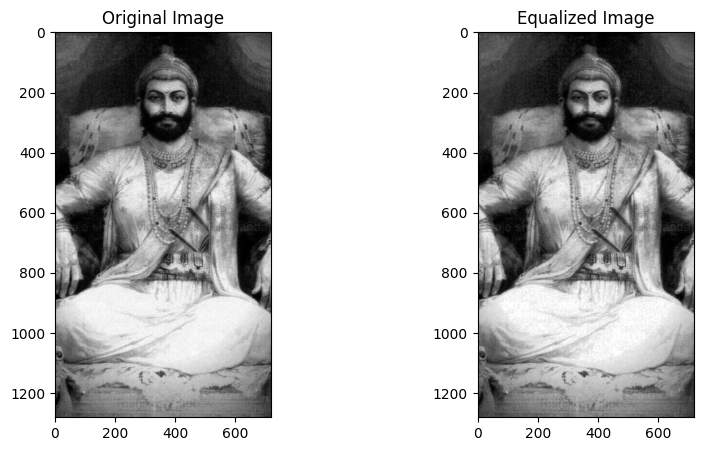

In [17]:

image = cv2.imread('C:/Semester4/digital_image_processing/dip_project/result_images/Restored_shivaji.jpg', cv2.IMREAD_GRAYSCALE)


equalized_image = cv2.equalizeHist(image)

cv2.imwrite("C:/Semester4/digital_image_processing/dip_project_/restored_new_images/new_image.jpg", equalized_image)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.show()


In [18]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

def calculate_metrics(original, processed):
    # Convert images to grayscale if they are in color
    if len(original.shape) == 3:
        original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    if len(processed.shape) == 3:
        processed = cv2.cvtColor(processed, cv2.COLOR_BGR2GRAY)
    
    # Calculate MSE
    mse = np.mean((original - processed) ** 2)

    # Calculate PSNR
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    psnr = 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

    # Calculate SSIM
    s = ssim(original, processed)

    return psnr, mse, s


In [20]:
psnr, mse, s = calculate_metrics(image, equalized_image)
print(f"PSNR: {psnr:.2f}")
print(f"MSE: {mse:.2f}")
print(f"SSIM: {s:.2f}\n")

PSNR: 28.45
MSE: 92.84
SSIM: 0.97



Spatial Domain Filter to remove impulse noise (Median Filter)

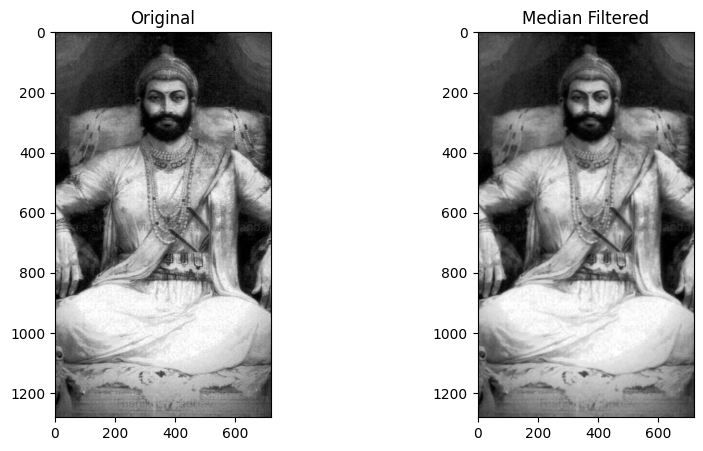

In [21]:
median_filtered = cv2.medianBlur(equalized_image, 5)  # Adjust the kernel size as needed


cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/median_f_new_image.jpg", median_filtered)



plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(equalized_image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered')
plt.show()


In [22]:
psnr, mse, s = calculate_metrics(equalized_image, median_filtered)
print(f"PSNR: {psnr:.2f}")
print(f"MSE: {mse:.2f}")
print(f"SSIM: {s:.2f}\n")

PSNR: 35.62
MSE: 17.81
SSIM: 0.90



smoothing image with gaussian blur

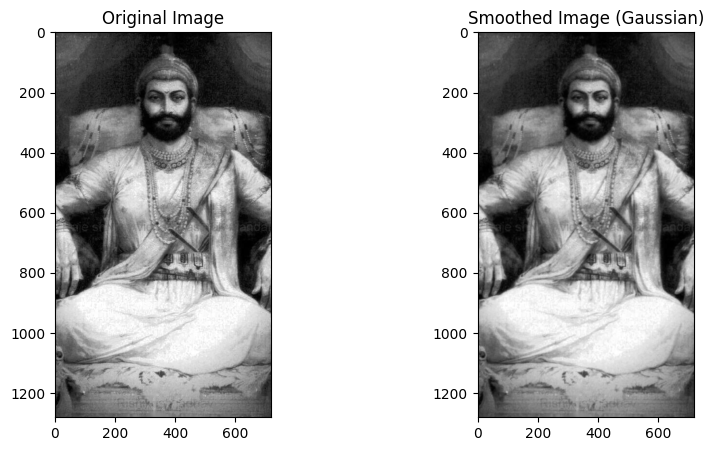

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



smoothed_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)


cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/smoothed_gaussian_blur_new_image.jpg", smoothed_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(equalized_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(smoothed_image, cmap='gray'), plt.title('Smoothed Image (Gaussian)')
plt.show()


In [25]:
psnr, mse, s = calculate_metrics(equalized_image, smoothed_image)
print(f"PSNR: {psnr:.2f}")
print(f"MSE: {mse:.2f}")
print(f"SSIM: {s:.2f}\n")

PSNR: 38.06
MSE: 10.16
SSIM: 0.96



Apply bilateral filtering and then sharpening the image

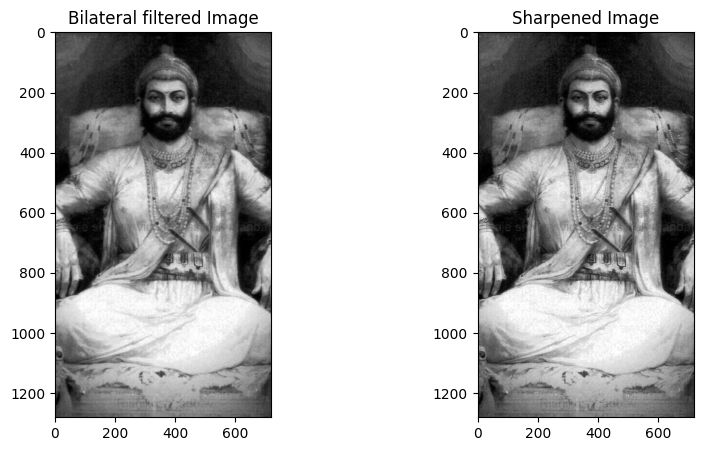

In [28]:


# Apply bilateral filter to remove noise
bilateral_filtered_img = cv2.bilateralFilter(equalized_image, 4, 20, 20)

# Apply sharpening filter to enhance details
sharpened_img = cv2.filter2D(bilateral_filtered_img, -1, kernel=np.array([[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]))


cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/bilateral_filter_new_image.jpg", bilateral_filtered_img)


cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/laplace_sharpened_new_image.jpg", sharpened_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow( bilateral_filtered_img, cmap='gray'), plt.title('Bilateral filtered Image')
plt.subplot(1, 2, 2), plt.imshow(sharpened_img, cmap='gray'), plt.title('Sharpened Image')
plt.show()

In [29]:
psnr, mse, s = calculate_metrics(equalized_image, bilateral_filtered_img)
print(f"PSNR: {psnr:.2f}")
print(f"MSE: {mse:.2f}")
print(f"SSIM: {s:.2f}\n")

psnr, mse, s = calculate_metrics(bilateral_filtered_img, sharpened_img)
print(f"PSNR: {psnr:.2f}")
print(f"MSE: {mse:.2f}")
print(f"SSIM: {s:.2f}\n")

PSNR: 39.38
MSE: 7.50
SSIM: 0.96

PSNR: 39.89
MSE: 6.67
SSIM: 0.98



sharpening image with unsharp Masking

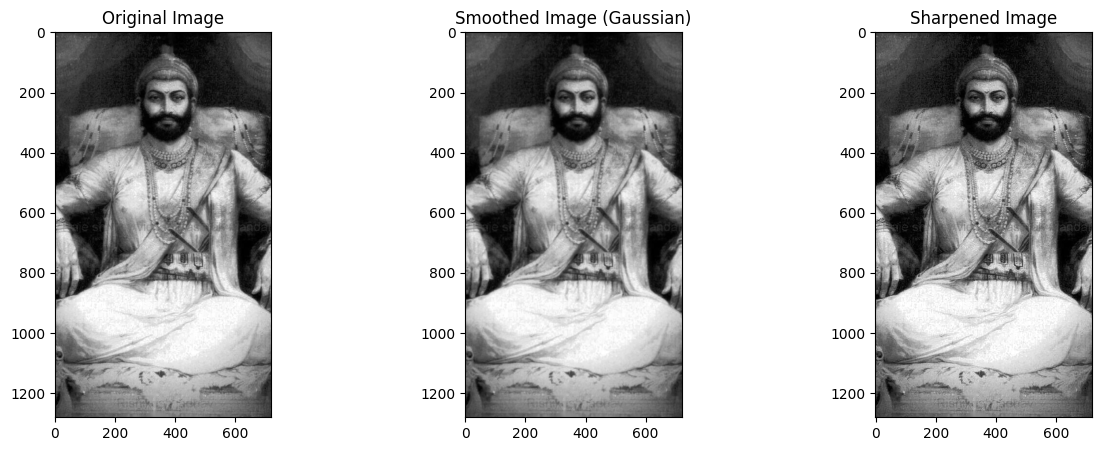

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


alpha = 1.4  

sharpened_image = cv2.addWeighted(equalized_image, 1 + alpha, smoothed_image, -alpha, 0)


cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/sharp_unmask_new_image.jpg", sharpened_image)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(equalized_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(smoothed_image, cmap='gray'), plt.title('Smoothed Image (Gaussian)')
plt.subplot(1, 3, 3), plt.imshow(sharpened_image, cmap='gray'), plt.title('Sharpened Image')

plt.show()


In [32]:
psnr, mse, s = calculate_metrics(equalized_image, sharpened_image)
print(f"PSNR: {psnr:.2f}")
print(f"MSE: {mse:.2f}")
print(f"SSIM: {s:.2f}\n")

PSNR: 35.67
MSE: 17.61
SSIM: 0.95



Resolution enhancement with Bicubic and Bilinear Interpolation

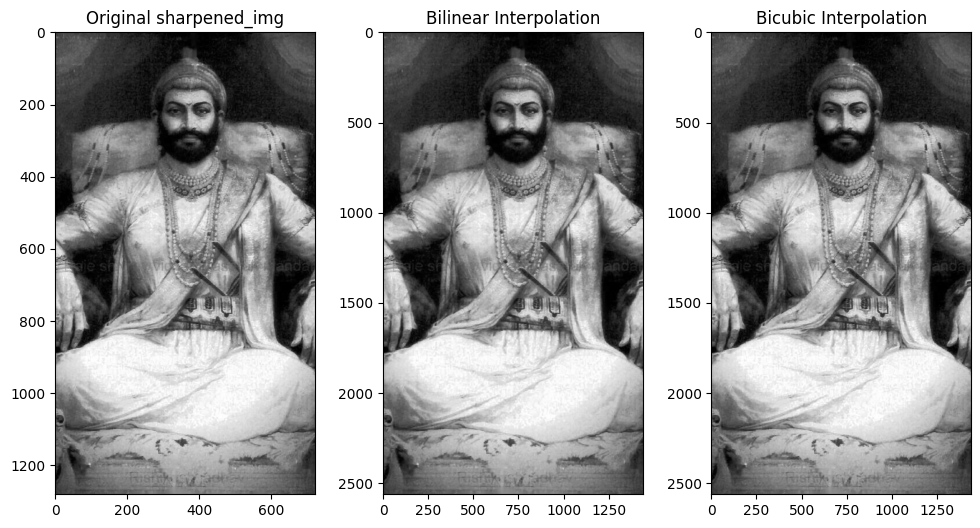

In [38]:


# Bilinear interpolation
height, width = 2 * sharpened_img.shape[0], 2 * sharpened_img.shape[1]
resized_bilinear = cv2.resize(sharpened_img, (width, height), interpolation=cv2.INTER_LINEAR)

# Bicubic interpolation
resized_bicubic = cv2.resize(sharpened_img, (width, height), interpolation=cv2.INTER_CUBIC)



cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/bicunic_resolution_new_image.jpg", resized_bicubic)



cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/bilinear_resolution_new_image.jpg", resized_bilinear)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
plt.title('Original sharpened_img')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(resized_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Bilinear Interpolation')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(resized_bicubic, cv2.COLOR_BGR2RGB))
plt.title('Bicubic Interpolation')

plt.show()


In [39]:
# img = 

psnr, mse, s = calculate_metrics(resized_bicubic, resized_bilinear)
print(f"PSNR: {psnr:.2f}")
print(f"MSE: {mse:.2f}")
print(f"SSIM: {s:.2f}\n")

PSNR: 46.65
MSE: 1.41
SSIM: 0.99



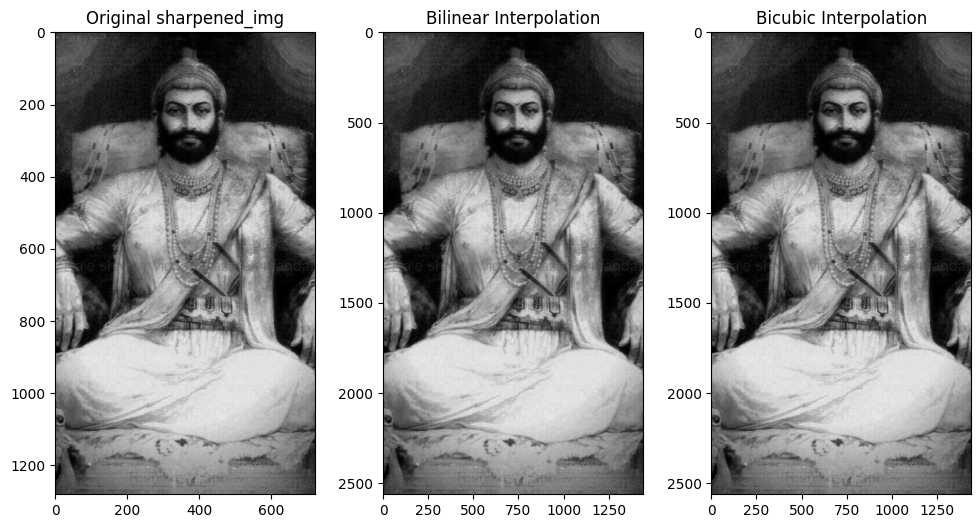

In [40]:

sharpened_img = cv2.imread('C:/Semester4/digital_image_processing/dip_project/result_images/Restored_shivaji.jpg', cv2.IMREAD_GRAYSCALE) 
# Bilinear interpolation
height, width = 2 * sharpened_img.shape[0], 2 * sharpened_img.shape[1]
resized_bilinear_ = cv2.resize(sharpened_img, (width, height), interpolation=cv2.INTER_LINEAR)

# Bicubic interpolation
resized_bicubic_ = cv2.resize(sharpened_img, (width, height), interpolation=cv2.INTER_CUBIC)



cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/bicunic_resolution_new_image.jpg", resized_bicubic_)



cv2.imwrite("C:/Semester4/digital_image_processing/dip_project/restored_new_images/bilinear_resolution_new_image.jpg", resized_bilinear_)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
plt.title('Original sharpened_img')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(resized_bilinear_, cv2.COLOR_BGR2RGB))
plt.title('Bilinear Interpolation')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(resized_bicubic_, cv2.COLOR_BGR2RGB))
plt.title('Bicubic Interpolation')

plt.show()


In [41]:
psnr, mse, s = calculate_metrics(resized_bicubic, resized_bicubic_)
print(f"PSNR: {psnr:.2f}")
print(f"MSE: {mse:.2f}")
print(f"SSIM: {s:.2f}\n")

PSNR: 29.02
MSE: 81.56
SSIM: 0.96



In [42]:
psnr, mse, s = calculate_metrics(resized_bilinear, resized_bilinear_)
print(f"PSNR: {psnr:.2f}")
print(f"MSE: {mse:.2f}")
print(f"SSIM: {s:.2f}\n")

PSNR: 28.92
MSE: 83.30
SSIM: 0.97



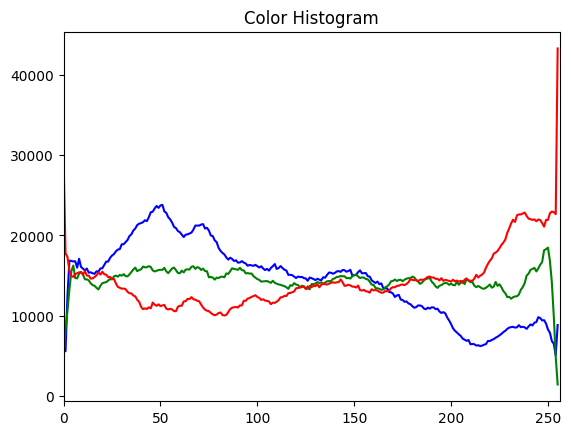

In [43]:
import cv2
from matplotlib import pyplot as plt

# Load the colorized image
colorized_img = cv2.imread('C:/Semester4/digital_image_processing/dip_project/bicunic_resolution_new_image.jpg')
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    histr = cv2.calcHist([colorized_img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Color Histogram')
plt.show()


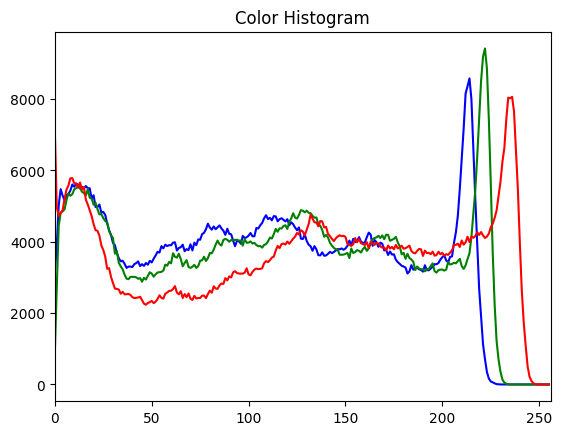

In [45]:
import cv2
from matplotlib import pyplot as plt

# Load the colorized image
image = cv2.imread('C:/Semester4/digital_image_processing/dip_project/result_images/Restored_shivaji.jpg')
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    histr = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Color Histogram')
plt.show()

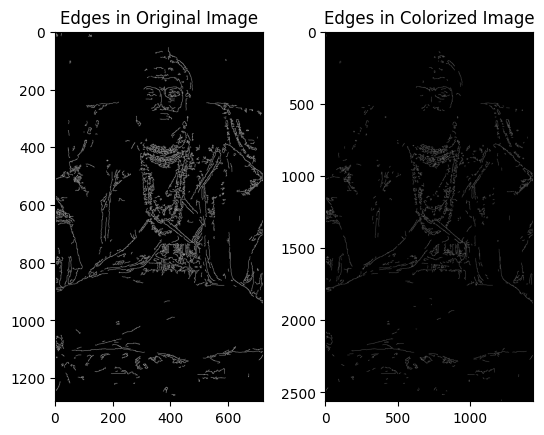

In [46]:
edges_original = cv2.Canny(image, 100, 200)
edges_colorized = cv2.Canny(colorized_img, 100, 200)

plt.subplot(121), plt.imshow(edges_original, cmap='gray')
plt.title('Edges in Original Image')
plt.subplot(122), plt.imshow(edges_colorized, cmap='gray')
plt.title('Edges in Colorized Image')
plt.show()


In [50]:
from skimage.metrics import structural_similarity as ssim

# Assuming 'original_img_gray' and 'colorized_img_gray' are already loaded as arrays in the workspace
# If 'colorized_img' is in color, you need to convert it to grayscale
colorized_img_gray = cv2.cvtColor(colorized_img, cv2.COLOR_BGR2GRAY)

# Calculate SSIM
ssim_index = ssim(resized_bicubic_, colorized_img_gray)
print(f"SSIM: {ssim_index}")


SSIM: 0.9534534460052011
